# RandomForestClassifier 모델 성능 비교 분석

## 📋 프로젝트 개요
Random Forest 알고리즘의 5가지 접근법을 통한 최적 모델 찾기 프로젝트

## 🎯 목표
- 5가지 다른 접근법을 통한 Random Forest 모델 성능 비교
- 최적의 하이퍼파라미터와 학습 방법 찾기
- 모델 성능 시각화 및 분석

## 📊 실험 설계
1. **Default_RF**: 기본 Random Forest (기준점)
2. **KFold_RF**: KFold 교차검증을 통한 정규화 모델
3. **StratifiedKFold_RF**: 클래스 비율 유지 모델
4. **GridSearchCV_RF**: 그리드 서치 최적화 모델
5. **HyperOpt_RF**: 베이지안 최적화 모델

In [ ]:
# 필요한 라이브러리 설치 (필요시 주석 해제)
# !pip install scikit-survival
# !pip install lifelines
# !pip install hyperopt

In [2]:
# =============================================================================
# 라이브러리 Import 및 기본 설정
# =============================================================================

# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (강화된 버전)
import matplotlib
import matplotlib.font_manager as fm

# 폰트 캐시 초기화 (필요시)
try:
    fm._rebuild()
except:
    pass

def setup_korean_font():
    """한글 폰트 설정 함수 (강화된 버전)"""
    try:
        # Windows 기본 한글 폰트 경로들
        font_paths = [
            'C:\\Windows\\Fonts\\malgun.ttf',     # 맑은 고딕 (가장 안정적)
            'C:\\Windows\\Fonts\\gulim.ttc',      # 굴림
            'C:\\Windows\\Fonts\\batang.ttc',     # 바탕
            'C:\\Windows\\Fonts\\dotum.ttc',      # 돋움
            'C:\\Windows\\Fonts\\gungsuh.ttc'     # 궁서
        ]
        
        # 사용 가능한 폰트 찾기
        available_fonts = []
        for font_path in font_paths:
            try:
                font_prop = fm.FontProperties(fname=font_path)
                font_name = font_prop.get_name()
                available_fonts.append((font_path, font_name))
                print(f"✅ 사용 가능한 폰트: {font_name} ({font_path})")
            except Exception as e:
                print(f"❌ 폰트 로드 실패: {font_path} - {e}")
                continue
        
        if available_fonts:
            # 첫 번째 사용 가능한 폰트 사용
            selected_font_path, selected_font_name = available_fonts[1]
            
            # matplotlib 설정 (여러 방법으로 설정)
            matplotlib.rcParams['font.family'] = selected_font_name
            matplotlib.rcParams['axes.unicode_minus'] = False
            matplotlib.rcParams['font.size'] = 10
            
            # 추가 설정
            plt.rcParams['font.family'] = selected_font_name
            plt.rcParams['axes.unicode_minus'] = False
            plt.rcParams['font.size'] = 10
            
            print(f"🎯 선택된 폰트: {selected_font_name}")
            print(f"   - matplotlib.rcParams['font.family']: {matplotlib.rcParams['font.family']}")
            print(f"   - plt.rcParams['font.family']: {plt.rcParams['font.family']}")
            return True, selected_font_name
        else:
            print("⚠️ 한글 폰트를 찾을 수 없습니다. 기본 폰트를 사용합니다.")
            return False, None
            
    except Exception as e:
        print(f"❌ 폰트 설정 오류: {e}")
        return False, None

# 폰트 설정 실행
font_setup_success, selected_font = setup_korean_font()

# 폰트 설정 확인
print(f"\n📊 최종 matplotlib 폰트 설정:")
print(f"   - font.family: {matplotlib.rcParams['font.family']}")
print(f"   - axes.unicode_minus: {plt.rcParams['axes.unicode_minus']}")
print(f"   - font.size: {plt.rcParams['font.size']}")

# 테스트용 한글 텍스트 출력
if font_setup_success:
    print(f"✅ 한글 폰트 설정 완료! (사용 폰트: {selected_font})")
else:
    print("⚠️ 한글 폰트 설정 실패 - 기본 폰트 사용")
    print("   이 경우 차트의 한글이 깨질 수 있습니다.")

# Scikit-learn 라이브러리
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, 
                           recall_score, f1_score, roc_curve, auc, classification_report)

# 하이퍼파라미터 튜닝
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# 커스텀 모듈
from modules.DataAnalysis import DataCheck, DataPreprocessing, DataVisualize
import modules.DataModify as DataModify

print("✅ 모든 라이브러리 import 완료")

✅ 사용 가능한 폰트: Malgun Gothic (C:\Windows\Fonts\malgun.ttf)
✅ 사용 가능한 폰트: Gulim (C:\Windows\Fonts\gulim.ttc)
✅ 사용 가능한 폰트: Batang (C:\Windows\Fonts\batang.ttc)
❌ 폰트 로드 실패: C:\Windows\Fonts\dotum.ttc - [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\dotum.ttc'
❌ 폰트 로드 실패: C:\Windows\Fonts\gungsuh.ttc - [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\gungsuh.ttc'
🎯 선택된 폰트: Gulim
   - matplotlib.rcParams['font.family']: ['Gulim']
   - plt.rcParams['font.family']: ['Gulim']

📊 최종 matplotlib 폰트 설정:
   - font.family: ['Gulim']
   - axes.unicode_minus: False
   - font.size: 10.0
✅ 한글 폰트 설정 완료! (사용 폰트: Gulim)
✅ 모든 라이브러리 import 완료


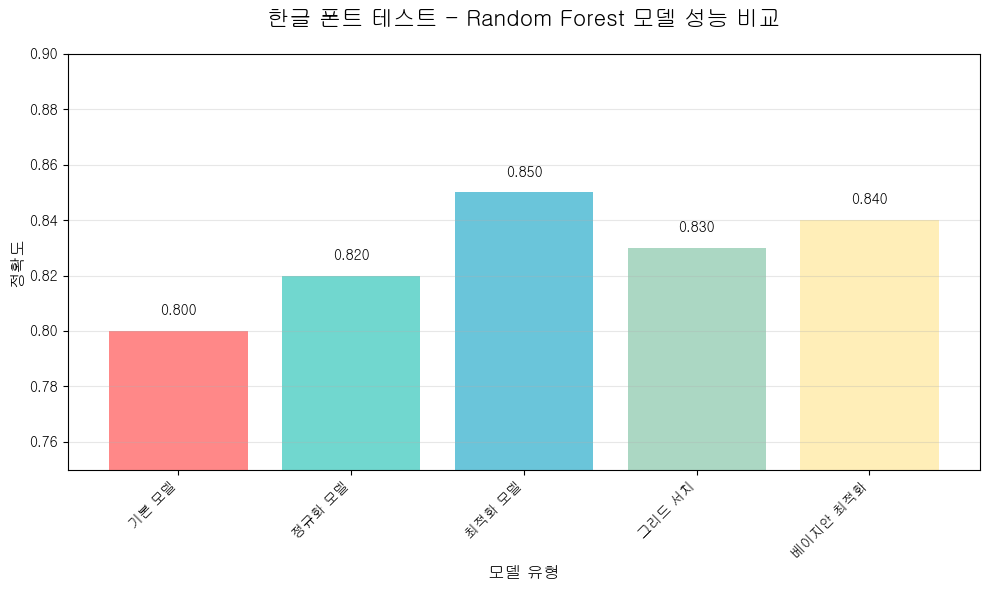

✅ 한글 폰트 테스트 완료 - 차트가 정상적으로 표시되었습니다.
   한글 텍스트가 깨지지 않고 표시되면 폰트 설정이 성공한 것입니다.

🔧 한글 폰트 문제 해결 방법:
1. 폰트 캐시 초기화: matplotlib.font_manager._rebuild()
2. Jupyter 커널 재시작 후 다시 실행
3. 폰트 파일 경로 확인
4. matplotlib 버전 확인: pip install --upgrade matplotlib


In [3]:
# =============================================================================
# 한글 폰트 테스트 및 검증
# =============================================================================

def test_korean_font():
    """한글 폰트 테스트 함수 (강화된 버전)"""
    try:
        # 새로운 figure 생성 (이전 설정 초기화)
        plt.figure(figsize=(10, 6))
        
        # 테스트 데이터
        x = ['기본 모델', '정규화 모델', '최적화 모델', '그리드 서치', '베이지안 최적화']
        y = [0.8, 0.82, 0.85, 0.83, 0.84]
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
        
        bars = plt.bar(x, y, color=colors, alpha=0.8)
        plt.title('한글 폰트 테스트 - Random Forest 모델 성능 비교', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.ylabel('정확도', fontsize=12)
        plt.xlabel('모델 유형', fontsize=12)
        plt.ylim(0.75, 0.9)
        
        # 막대 위에 값 표시
        for bar, value in zip(bars, y):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        # 그리드 추가
        plt.grid(True, alpha=0.3, axis='y')
        
        # x축 라벨 회전
        plt.xticks(rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        print("✅ 한글 폰트 테스트 완료 - 차트가 정상적으로 표시되었습니다.")
        print("   한글 텍스트가 깨지지 않고 표시되면 폰트 설정이 성공한 것입니다.")
        return True
        
    except Exception as e:
        print(f"❌ 한글 폰트 테스트 실패: {e}")
        return False

# 폰트 테스트 실행
if font_setup_success:
    test_korean_font()
else:
    print("⚠️ 폰트 설정이 실패했으므로 테스트를 건너뜁니다.")

# 추가 폰트 문제 해결 방법
print(f"\n🔧 한글 폰트 문제 해결 방법:")
print("1. 폰트 캐시 초기화: matplotlib.font_manager._rebuild()")
print("2. Jupyter 커널 재시작 후 다시 실행")
print("3. 폰트 파일 경로 확인")
print("4. matplotlib 버전 확인: pip install --upgrade matplotlib")


In [4]:
# =============================================================================
# 데이터 로드 및 전처리
# =============================================================================

# 데이터 로드
input_file_path = './data/Tree_data.csv'
df = pd.read_csv(input_file_path)

# 객체 인스턴스 생성
dc = DataCheck(df)
dp = DataPreprocessing(df)
dv = DataVisualize(df)

# 데이터 전처리
drop_cols = ['No', 'Plot', 'Adult', 'Subplot', 'Core', 'Census', 'Time']
dp.set_drop_cols(drop_cols)
encode = dp.run(encoding='label', return_anomaly=False)

# 훈련/테스트 데이터 분리
alive_data = encode[encode['Alive'] != 1]
censored_data = encode[encode['Alive'] == 1]
train_set, test_set = DataModify.train_test_split_ignore_censored(alive_data, censored_data)

# 데이터 분리 및 전처리
X_train, y_train = train_set
X_test, y_test = test_set

# y 데이터 처리
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]
y_train = y_train.values.ravel().astype(int)

if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]
y_test = y_test.values.ravel().astype(int)

print(f"✅ 데이터 로드 및 전처리 완료")
print(f"   훈련 데이터: {X_train.shape}, 타겟: {y_train.shape}")
print(f"   테스트 데이터: {X_test.shape}, 타겟: {y_test.shape}")
print(f"   클래스 분포 - 훈련: {np.bincount(y_train)}, 테스트: {np.bincount(y_test)}")

✅ 데이터 로드 및 전처리 완료
   훈련 데이터: (2366, 14), 타겟: (2366,)
   테스트 데이터: (416, 14), 타겟: (416,)
   클래스 분포 - 훈련: [1812  554], 테스트: [312 104]


In [5]:
# =============================================================================
# 평가 함수 정의
# =============================================================================

def train_model_evaluation(model, X_train, y_train, X_test, y_test, model_name=""):
    """모델 훈련 성능 평가 함수"""
    print(f"\n{'='*60}")
    print(f"📊 {model_name} 모델 평가")
    print(f"{'='*60}")
    
    # 기본 점수
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # 교차검증 점수
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    print(f"Training Score     : {train_score:.4f}")
    print(f"Testing Score      : {test_score:.4f}")
    print(f"Cross Validation   : {cv_mean:.4f} (±{cv_std:.4f})")
    
    return {
        'train_score': train_score,
        'test_score': test_score,
        'cv_mean': cv_mean,
        'cv_std': cv_std
    }

def evaluate_binary_classification(y_true, y_pred, model_name=""):
    """이진 분류 성능 평가 함수"""
    print(f"\n📈 {model_name} 상세 성능 지표")
    print(f"{'='*40}")
    
    # 기본 지표
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # 혼동 행렬
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"Accuracy           : {accuracy:.4f}")
    print(f"Precision          : {precision:.4f}")
    print(f"Recall             : {recall:.4f}")
    print(f"F1 Score           : {f1:.4f}")
    print(f"Confusion Matrix   :")
    print(f"                   {cm[0]}")
    print(f"                   {cm[1]}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }

print("✅ 평가 함수 정의 완료")

✅ 평가 함수 정의 완료


In [35]:
# =============================================================================
# 1. Default Random Forest 모델 (기준점)
# =============================================================================

print("\n" + "="*80)
print("🌲 1. Default Random Forest 모델 (기준점)")
print("="*80)

# 기본 Random Forest 모델 생성
rf_default = RandomForestClassifier(
    n_estimators=100,        # 트리 개수
    random_state=42,         # 재현 가능한 결과
    n_jobs=-1               # 모든 CPU 코어 사용
)

# 모델 훈련
rf_default.fit(X_train, y_train)

# 예측
y_pred_default = rf_default.predict(X_test)

# 성능 평가
default_scores = train_model_evaluation(rf_default, X_train, y_train, X_test, y_test, "Default Random Forest")
default_metrics = evaluate_binary_classification(y_test, y_pred_default, "Default Random Forest")

# 결과 저장
model_results = {
    'Default_RF': {
        'model': rf_default,
        'params': {'n_estimators': 100, 'random_state': 42},
        'scores': default_scores,
        'metrics': default_metrics,
        'predictions': y_pred_default
    }
}

print(f"\n✅ Default Random Forest 모델 완료")
print(f"   최적 파라미터: {model_results['Default_RF']['params']}")
print(f"   테스트 정확도: {default_metrics['accuracy']:.4f}")
print(f"   F1 점수: {default_metrics['f1']:.4f}")


🌲 1. Default Random Forest 모델 (기준점)

📊 Default Random Forest 모델 평가
Training Score     : 0.9590
Testing Score      : 0.8221
Cross Validation   : 0.7768 (±0.0565)

📈 Default Random Forest 상세 성능 지표
Accuracy           : 0.8221
Precision          : 0.6744
Recall             : 0.5577
F1 Score           : 0.6105
Confusion Matrix   :
                   [284  28]
                   [46 58]

✅ Default Random Forest 모델 완료
   최적 파라미터: {'n_estimators': 100, 'random_state': 42}
   테스트 정확도: 0.8221
   F1 점수: 0.6105


In [36]:
# =============================================================================
# 2. KFold Random Forest 모델 (정규화)
# =============================================================================

print("\n" + "="*80)
print("🌲 2. KFold Random Forest 모델 (정규화)")
print("="*80)

# 정규화된 Random Forest 모델 생성 (과적합 방지)
rf_kfold = RandomForestClassifier(
    n_estimators=50,           # 트리 수 감소
    max_depth=10,              # 최대 깊이 제한
    min_samples_split=10,      # 분할 최소 샘플 수 증가
    min_samples_leaf=5,        # 리프 최소 샘플 수 증가
    max_features='sqrt',       # 피처 수 제한
    random_state=42,
    n_jobs=-1
)

# KFold 교차검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 교차검증 수행
cv_scores_kfold = cross_val_score(rf_kfold, X_train, y_train, cv=kfold, scoring='accuracy')

# 전체 훈련 데이터로 최종 학습
rf_kfold.fit(X_train, y_train)

# 예측
y_pred_kfold = rf_kfold.predict(X_test)

# 성능 평가
kfold_scores = train_model_evaluation(rf_kfold, X_train, y_train, X_test, y_test, "KFold Random Forest")
kfold_metrics = evaluate_binary_classification(y_test, y_pred_kfold, "KFold Random Forest")

# 결과 저장
model_results['KFold_RF'] = {
    'model': rf_kfold,
    'params': {
        'n_estimators': 50, 
        'max_depth': 10, 
        'min_samples_split': 10, 
        'min_samples_leaf': 5, 
        'max_features': 'sqrt', 
        'random_state': 42
    },
    'scores': kfold_scores,
    'metrics': kfold_metrics,
    'predictions': y_pred_kfold
}

print(f"\n✅ KFold Random Forest 모델 완료")
print(f"   최적 파라미터: {model_results['KFold_RF']['params']}")
print(f"   테스트 정확도: {kfold_metrics['accuracy']:.4f}")
print(f"   F1 점수: {kfold_metrics['f1']:.4f}")
print(f"   과적합 방지 효과: {kfold_scores['train_score'] - kfold_scores['test_score']:.4f}")


🌲 2. KFold Random Forest 모델 (정규화)

📊 KFold Random Forest 모델 평가
Training Score     : 0.8694
Testing Score      : 0.8269
Cross Validation   : 0.7718 (±0.0577)

📈 KFold Random Forest 상세 성능 지표
Accuracy           : 0.8269
Precision          : 0.6951
Recall             : 0.5481
F1 Score           : 0.6129
Confusion Matrix   :
                   [287  25]
                   [47 57]

✅ KFold Random Forest 모델 완료
   최적 파라미터: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'random_state': 42}
   테스트 정확도: 0.8269
   F1 점수: 0.6129
   과적합 방지 효과: 0.0425


In [37]:
# =============================================================================
# 3. StratifiedKFold Random Forest 모델 (클래스 비율 유지)
# =============================================================================

print("\n" + "="*80)
print("🌲 3. StratifiedKFold Random Forest 모델 (클래스 비율 유지)")
print("="*80)

# 대용량 Random Forest 모델 생성 (클래스 불균형 대응)
rf_stratified = RandomForestClassifier(
    n_estimators=200,          # 트리 수 증가
    max_depth=None,            # 깊이 제한 없음
    min_samples_split=2,       # 기본값
    min_samples_leaf=1,        # 기본값
    max_features='log2',       # 피처 수 제한
    bootstrap=True,            # 부트스트랩 샘플링
    random_state=42,
    n_jobs=-1
)

# StratifiedKFold 교차검증 설정 (클래스 비율 유지)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차검증 수행
cv_scores_stratified = cross_val_score(rf_stratified, X_train, y_train, cv=skfold, scoring='accuracy')

# 전체 훈련 데이터로 최종 학습
rf_stratified.fit(X_train, y_train)

# 예측
y_pred_stratified = rf_stratified.predict(X_test)

# 성능 평가
stratified_scores = train_model_evaluation(rf_stratified, X_train, y_train, X_test, y_test, "StratifiedKFold Random Forest")
stratified_metrics = evaluate_binary_classification(y_test, y_pred_stratified, "StratifiedKFold Random Forest")

# 결과 저장
model_results['StratifiedKFold_RF'] = {
    'model': rf_stratified,
    'params': {
        'n_estimators': 200, 
        'max_depth': None, 
        'min_samples_split': 2, 
        'min_samples_leaf': 1, 
        'max_features': 'log2', 
        'bootstrap': True, 
        'random_state': 42
    },
    'scores': stratified_scores,
    'metrics': stratified_metrics,
    'predictions': y_pred_stratified
}

print(f"\n✅ StratifiedKFold Random Forest 모델 완료")
print(f"   최적 파라미터: {model_results['StratifiedKFold_RF']['params']}")
print(f"   테스트 정확도: {stratified_metrics['accuracy']:.4f}")
print(f"   F1 점수: {stratified_metrics['f1']:.4f}")
print(f"   클래스 불균형 대응 효과: StratifiedKFold 사용")


🌲 3. StratifiedKFold Random Forest 모델 (클래스 비율 유지)

📊 StratifiedKFold Random Forest 모델 평가
Training Score     : 0.9590
Testing Score      : 0.8293
Cross Validation   : 0.7705 (±0.0601)

📈 StratifiedKFold Random Forest 상세 성능 지표
Accuracy           : 0.8293
Precision          : 0.6854
Recall             : 0.5865
F1 Score           : 0.6321
Confusion Matrix   :
                   [284  28]
                   [43 61]

✅ StratifiedKFold Random Forest 모델 완료
   최적 파라미터: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'random_state': 42}
   테스트 정확도: 0.8293
   F1 점수: 0.6321
   클래스 불균형 대응 효과: StratifiedKFold 사용


In [38]:
# =============================================================================
# 4. GridSearchCV Random Forest 모델 (그리드 서치 최적화)
# =============================================================================

print("\n" + "="*80)
print("🌲 4. GridSearchCV Random Forest 모델 (그리드 서치 최적화)")
print("="*80)

# 하이퍼파라미터 탐색 범위 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# 기본 Random Forest 모델
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("🔍 GridSearchCV 최적화 시작...")
grid_search.fit(X_train, y_train)

# 최적 모델로 예측
y_pred_grid = grid_search.predict(X_test)

# 성능 평가
grid_scores = train_model_evaluation(grid_search, X_train, y_train, X_test, y_test, "GridSearchCV Random Forest")
grid_metrics = evaluate_binary_classification(y_test, y_pred_grid, "GridSearchCV Random Forest")

# 결과 저장
model_results['GridSearchCV_RF'] = {
    'model': grid_search,
    'params': grid_search.best_params_,
    'scores': grid_scores,
    'metrics': grid_metrics,
    'predictions': y_pred_grid
}

print(f"\n✅ GridSearchCV Random Forest 모델 완료")
print(f"   최적 파라미터: {grid_search.best_params_}")
print(f"   최적 교차검증 점수: {grid_search.best_score_:.4f}")
print(f"   테스트 정확도: {grid_metrics['accuracy']:.4f}")
print(f"   F1 점수: {grid_metrics['f1']:.4f}")
print(f"   탐색한 조합 수: {len(grid_search.cv_results_['params'])}")


🌲 4. GridSearchCV Random Forest 모델 (그리드 서치 최적화)
🔍 GridSearchCV 최적화 시작...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

📊 GridSearchCV Random Forest 모델 평가
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Training Score     : 0.8960
Testing Score      : 0.8389
Cross Validation   : 0.7726 (±0.0603)

📈 GridSearchCV Random Forest 상세 성능 지표
Accuracy           : 0.8389
Precision          : 0.7126
Recall             : 0.5962
F1 Score           : 0.6492
Confusion Matrix   :
                   [287  25]
                   [42 62]

✅ GridSearchCV Random Forest 모델 완료
   최적 파라미터: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
   최적 교

In [39]:
# =============================================================================
# 5. HyperOpt Random Forest 모델 (베이지안 최적화)
# =============================================================================

print("\n" + "="*80)
print("🌲 5. HyperOpt Random Forest 모델 (베이지안 최적화)")
print("="*80)

# 탐색 공간 정의
search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 25),
    'max_depth': hp.quniform('max_depth', 5, 25, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 15, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 8, 1),
    'max_features': hp.choice('max_features', ['sqrt', 'log2']),
    'bootstrap': hp.choice('bootstrap', [True, False]),
    'random_state': 42
}

def rf_objective(search_space):
    """HyperOpt 목적함수"""
    rf_params = {
        'n_estimators': int(search_space['n_estimators']),
        'max_depth': int(search_space['max_depth']) if search_space['max_depth'] > 0 else None,
        'min_samples_split': int(search_space['min_samples_split']),
        'min_samples_leaf': int(search_space['min_samples_leaf']),
        'max_features': search_space['max_features'],
        'bootstrap': search_space['bootstrap'],
        'random_state': 42,
        'n_jobs': -1
    }
    
    rf_model = RandomForestClassifier(**rf_params)
    
    try:
        cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        mean_accuracy = cv_scores.mean()
    except Exception as e:
        print(f"교차검증 오류: {e}")
        mean_accuracy = 0.0
    
    return {
        'loss': -mean_accuracy,
        'status': STATUS_OK,
        'accuracy': mean_accuracy
    }

# HyperOpt 최적화 실행
print("🔍 HyperOpt 최적화 시작...")
trials = Trials()
best_val = fmin(
    fn=rf_objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    verbose=1
)

# 최적 파라미터로 모델 생성
max_features_mapping = {0: 'sqrt', 1: 'log2'}
optimal_params = {
    'n_estimators': int(best_val['n_estimators']),
    'max_depth': int(best_val['max_depth']) if best_val['max_depth'] > 0 else None,
    'min_samples_split': int(best_val['min_samples_split']),
    'min_samples_leaf': int(best_val['min_samples_leaf']),
    'max_features': max_features_mapping[best_val['max_features']],
    'bootstrap': bool(best_val['bootstrap']),
    'random_state': 42,
    'n_jobs': -1
}

# 최적 교차검증 점수 계산 (trials에서 가져오기)
best_loss = min([trial['result']['loss'] for trial in trials.trials])
best_cv_score = -best_loss  # loss는 음수이므로 양수로 변환

rf_hyperopt = RandomForestClassifier(**optimal_params)
rf_hyperopt.fit(X_train, y_train)
y_pred_hyperopt = rf_hyperopt.predict(X_test)

# 성능 평가
hyperopt_scores = train_model_evaluation(rf_hyperopt, X_train, y_train, X_test, y_test, "HyperOpt Random Forest")
hyperopt_metrics = evaluate_binary_classification(y_test, y_pred_hyperopt, "HyperOpt Random Forest")

# 결과 저장
model_results['HyperOpt_RF'] = {
    'model': rf_hyperopt,
    'params': optimal_params,
    'scores': hyperopt_scores,
    'metrics': hyperopt_metrics,
    'predictions': y_pred_hyperopt
}

print(f"\n✅ HyperOpt Random Forest 모델 완료")
print(f"   최적 파라미터: {optimal_params}")
print(f"   최적 교차검증 점수: {best_cv_score:.4f}")
print(f"   테스트 정확도: {hyperopt_metrics['accuracy']:.4f}")
print(f"   F1 점수: {hyperopt_metrics['f1']:.4f}")
print(f"   시도 횟수: {len(trials.trials)}")
print(f"   최적화 과정에서 찾은 최고 점수: {best_cv_score:.4f}")


🌲 5. HyperOpt Random Forest 모델 (베이지안 최적화)
🔍 HyperOpt 최적화 시작...
100%|██████████| 50/50 [00:16<00:00,  3.09trial/s, best loss: -0.7835960428542117]

📊 HyperOpt Random Forest 모델 평가
Training Score     : 0.9210
Testing Score      : 0.8365
Cross Validation   : 0.7781 (±0.0483)

📈 HyperOpt Random Forest 상세 성능 지표
Accuracy           : 0.8365
Precision          : 0.7093
Recall             : 0.5865
F1 Score           : 0.6421
Confusion Matrix   :
                   [287  25]
                   [43 61]

✅ HyperOpt Random Forest 모델 완료
   최적 파라미터: {'n_estimators': 275, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False, 'random_state': 42, 'n_jobs': -1}
   최적 교차검증 점수: 0.7836
   테스트 정확도: 0.8365
   F1 점수: 0.6421
   시도 횟수: 50
   최적화 과정에서 찾은 최고 점수: 0.7836


In [41]:
# =============================================================================
# 6. 결과 비교 및 시각화
# =============================================================================

print("\n" + "="*80)
print("📊 Random Forest 모델 성능 비교 결과")
print("="*80)

# 결과를 DataFrame으로 변환
results_data = []
for model_name, model_info in model_results.items():
    results_data.append({
        'Model': model_name,
        'Train_Score': model_info['scores']['train_score'],
        'Test_Score': model_info['scores']['test_score'],
        'CV_Mean': model_info['scores']['cv_mean'],
        'CV_Std': model_info['scores']['cv_std'],
        'Accuracy': model_info['metrics']['accuracy'],
        'Precision': model_info['metrics']['precision'],
        'Recall': model_info['metrics']['recall'],
        'F1_Score': model_info['metrics']['f1']
    })

results_df = pd.DataFrame(results_data)
results_df = results_df.set_index('Model')

print("\n📊 성능 비교 테이블:")
print("="*80)
print(results_df.round(4))

# 모델별 특징 요약
print("\n🔍 모델별 특징 요약:")
print("="*50)
print("1. Default_RF: 기본 설정 (n_estimators=100)")
print("2. KFold_RF: 과적합 방지 설정 (제한적 파라미터)")
print("3. StratifiedKFold_RF: 클래스 비율 유지 모델")
print("4. GridSearchCV_RF: 그리드 서치 최적화")
print("5. HyperOpt_RF: 베이지안 최적화")


📊 Random Forest 모델 성능 비교 결과

📊 성능 비교 테이블:
                    Train_Score  Test_Score  CV_Mean  CV_Std  Accuracy  \
Model                                                                    
Default_RF               0.9590      0.8221   0.7768  0.0565    0.8221   
KFold_RF                 0.8694      0.8269   0.7718  0.0577    0.8269   
StratifiedKFold_RF       0.9590      0.8293   0.7705  0.0601    0.8293   
GridSearchCV_RF          0.8960      0.8389   0.7726  0.0603    0.8389   
HyperOpt_RF              0.9210      0.8365   0.7781  0.0483    0.8365   

                    Precision  Recall  F1_Score  
Model                                            
Default_RF             0.6744  0.5577    0.6105  
KFold_RF               0.6951  0.5481    0.6129  
StratifiedKFold_RF     0.6854  0.5865    0.6321  
GridSearchCV_RF        0.7126  0.5962    0.6492  
HyperOpt_RF            0.7093  0.5865    0.6421  

🔍 모델별 특징 요약:
1. Default_RF: 기본 설정 (n_estimators=100)
2. KFold_RF: 과적합 방지 설정 (제한적 파라미터)


In [ ]:
# =============================================================================
# 시각화 전 폰트 설정
# =============================================================================

def ensure_korean_font_for_visualization():
    """시각화 전 폰트 설정 확인 및 강화"""
    try:
        # 현재 설정된 폰트 확인
        current_font = matplotlib.rcParams['font.family']
        print(f"현재 폰트 설정: {current_font}")
        
        # 한글 폰트가 설정되어 있지 않으면 다시 설정
        if isinstance(current_font, list) and len(current_font) > 0:
            current_font = current_font[0]
        
        if 'Malgun' not in current_font and 'Gulim' not in current_font and 'Batang' not in current_font:
            print("⚠️ 한글 폰트가 설정되지 않음. 다시 설정합니다.")
            # 맑은 고딕으로 강제 설정
            matplotlib.rcParams['font.family'] = 'Malgun Gothic'
            plt.rcParams['font.family'] = 'Malgun Gothic'
            print(f"✅ 폰트 재설정 완료: {plt.rcParams['font.family']}")
        else:
            print(f"✅ 한글 폰트 설정 확인: {current_font}")
            
        # 추가 설정
        matplotlib.rcParams['axes.unicode_minus'] = False
        plt.rcParams['axes.unicode_minus'] = False
        
        return True
            
    except Exception as e:
        print(f"❌ 폰트 설정 오류: {e}")
        return False

# 폰트 설정 확인
font_ok = ensure_korean_font_for_visualization()

if font_ok:
    print("✅ 시각화용 폰트 설정 완료!")
else:
    print("⚠️ 폰트 설정 실패 - 차트에서 한글이 깨질 수 있습니다.")


현재 폰트 설정: ['sans-serif']
⚠️ 한글 폰트가 설정되지 않음. 다시 설정합니다.
✅ 폰트 재설정 완료: ['Malgun Gothic']
✅ 시각화용 폰트 설정 완료!


In [ ]:
# =============================================================================
# 시각화 코드 - 폰트 설정
# =============================================================================

# 모든 시각화에서 사용할 폰트 설정
FONT_FAMILY = 'Malgun Gothic'
FONT_SIZE_TITLE = 16
FONT_SIZE_LABEL = 12
FONT_SIZE_TICK = 10

# matplotlib 전역 설정
matplotlib.rcParams['font.family'] = FONT_FAMILY
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = FONT_FAMILY
plt.rcParams['axes.unicode_minus'] = False

print(f"✅ 시각화용 폰트 설정 완료: {FONT_FAMILY}")

# 시각화 헬퍼 함수
def set_korean_font(ax, title=None, xlabel=None, ylabel=None):
    """한글 폰트 설정 헬퍼 함수"""
    if title:
        ax.set_title(title, fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL, fontweight='bold')
    if xlabel:
        ax.set_xlabel(xlabel, fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL)
    if ylabel:
        ax.set_ylabel(ylabel, fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL)
    
    # 틱 라벨 폰트 설정
    for label in ax.get_xticklabels():
        label.set_fontfamily(FONT_FAMILY)
        label.set_fontsize(FONT_SIZE_TICK)
    for label in ax.get_yticklabels():
        label.set_fontfamily(FONT_FAMILY)
        label.set_fontsize(FONT_SIZE_TICK)

print("✅ 시각화 헬퍼 함수 정의 완료")


✅ 시각화용 폰트 설정 완료: Malgun Gothic
✅ 시각화 헬퍼 함수 정의 완료


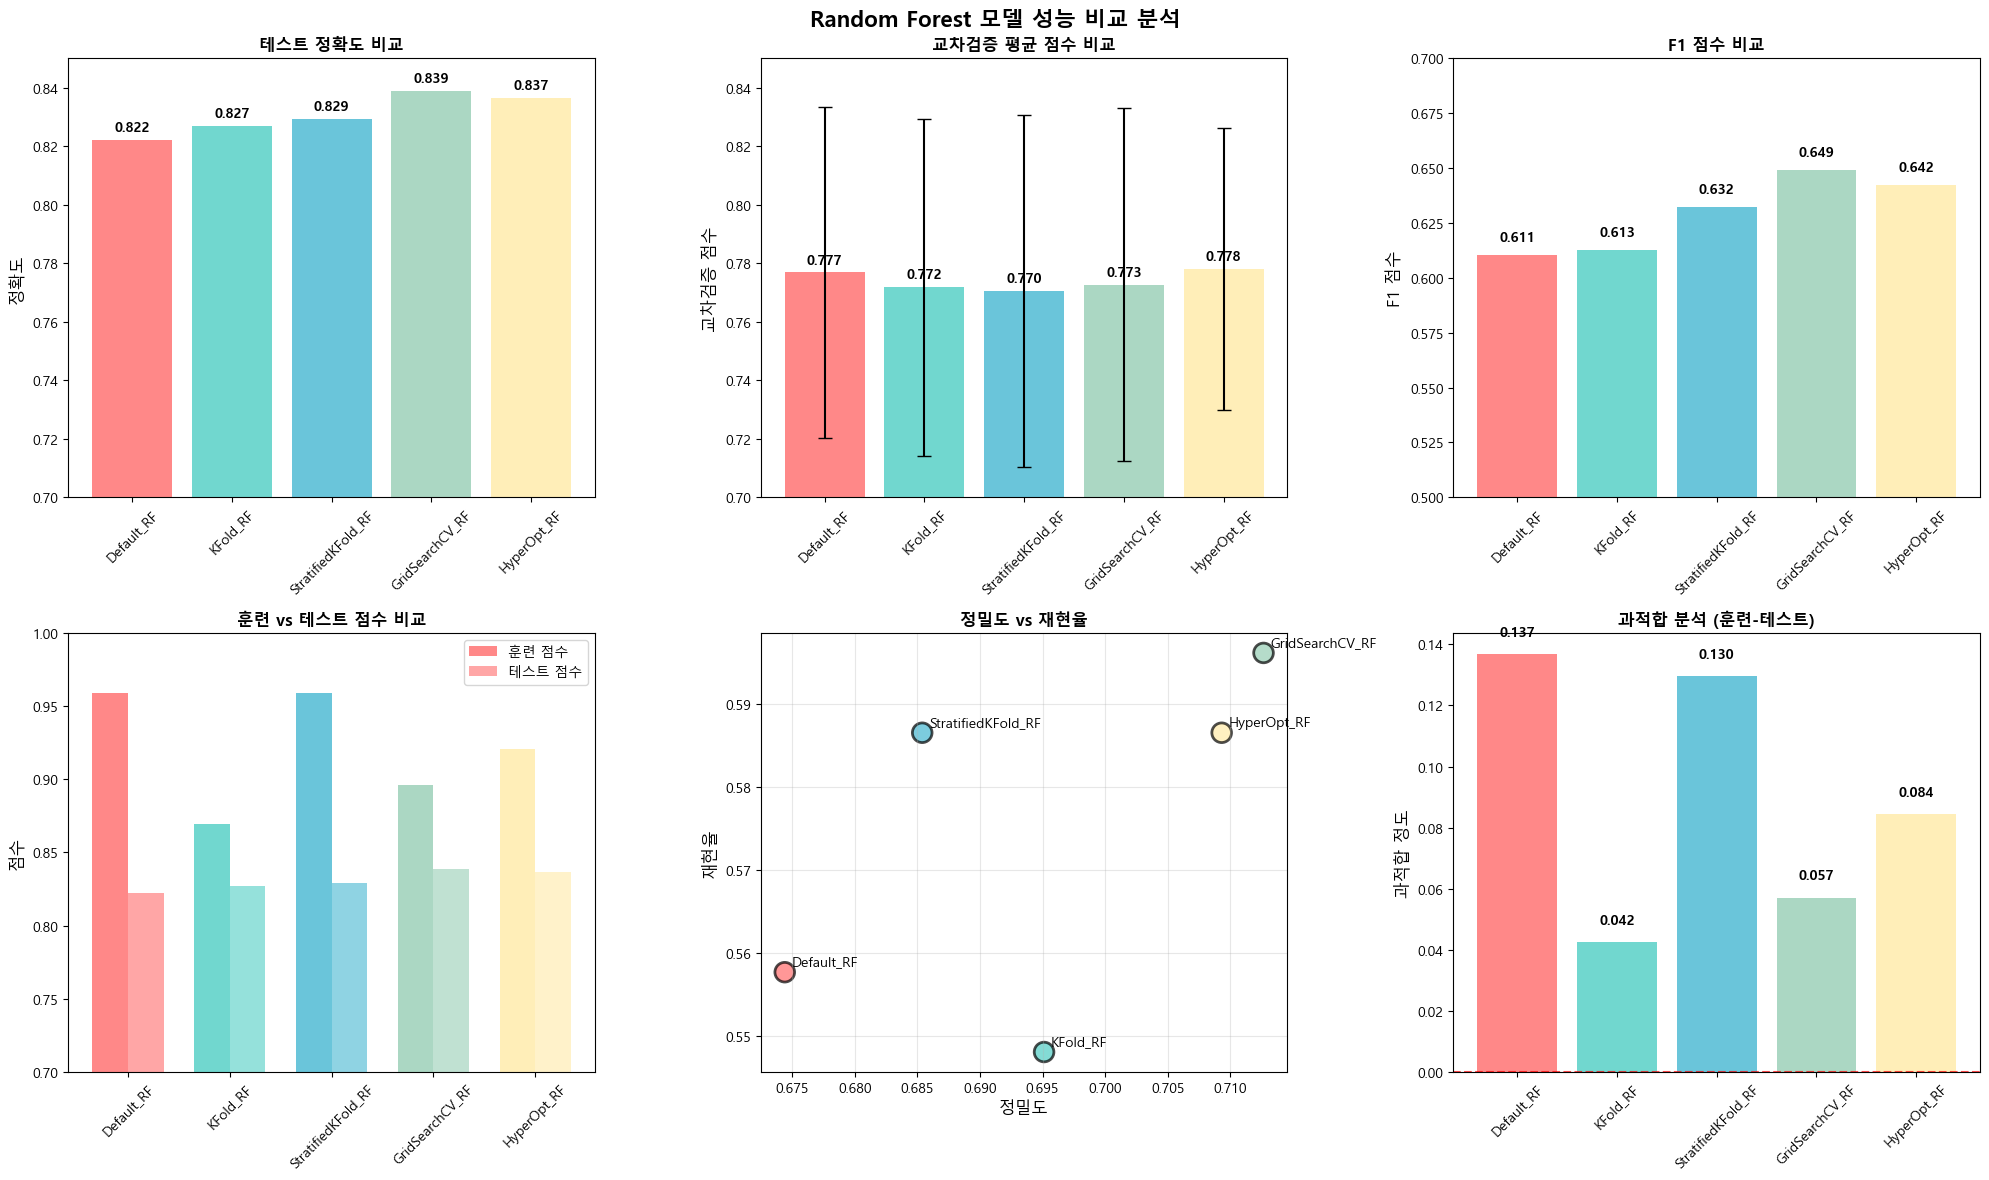


✅ 모델 성능 비교 차트


In [42]:
# =============================================================================
# 7. 고급 시각화 - 성능 비교 차트
# =============================================================================

# 시각화 설정
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 제목 설정 (폰트 명시)
fig.suptitle('Random Forest 모델 성능 비교 분석', 
             fontsize=FONT_SIZE_TITLE, fontweight='bold', 
             fontfamily=FONT_FAMILY)

# 색상 팔레트
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
model_names = list(results_df.index)

# 1. 정확도 비교
bars1 = axes[0, 0].bar(model_names, results_df['Accuracy'], color=colors, alpha=0.8)
set_korean_font(axes[0, 0], title='테스트 정확도 비교', ylabel='정확도')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim(0.7, 0.85)
for i, (bar, v) in enumerate(zip(bars1, results_df['Accuracy'])):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
                    f'{v:.3f}', ha='center', va='bottom', fontweight='bold', 
                    fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_TICK)

# 2. 교차검증 점수 비교 (오차막대 포함)
bars2 = axes[0, 1].bar(model_names, results_df['CV_Mean'], color=colors, alpha=0.8, 
                       yerr=results_df['CV_Std'], capsize=5)
set_korean_font(axes[0, 1], title='교차검증 평균 점수 비교', ylabel='교차검증 점수')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim(0.7, 0.85)
for i, (bar, v) in enumerate(zip(bars2, results_df['CV_Mean'])):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
                    f'{v:.3f}', ha='center', va='bottom', fontweight='bold',
                    fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_TICK)

# 3. F1 점수 비교
bars3 = axes[0, 2].bar(model_names, results_df['F1_Score'], color=colors, alpha=0.8)
set_korean_font(axes[0, 2], title='F1 점수 비교', ylabel='F1 점수')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].set_ylim(0.5, 0.7)
for i, (bar, v) in enumerate(zip(bars3, results_df['F1_Score'])):
    axes[0, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                    f'{v:.3f}', ha='center', va='bottom', fontweight='bold',
                    fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_TICK)

# 4. 훈련 vs 테스트 점수 비교
x = range(len(results_df))
width = 0.35
bars4_train = axes[1, 0].bar([i - width/2 for i in x], results_df['Train_Score'], width, 
                             label='훈련 점수', alpha=0.8, color=colors)
bars4_test = axes[1, 0].bar([i + width/2 for i in x], results_df['Test_Score'], width, 
                            label='테스트 점수', alpha=0.6, color=colors)
set_korean_font(axes[1, 0], title='훈련 vs 테스트 점수 비교', ylabel='점수')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(model_names, rotation=45)
axes[1, 0].legend(prop={'family': FONT_FAMILY, 'size': FONT_SIZE_TICK})
axes[1, 0].set_ylim(0.7, 1.0)

# 5. 정밀도 vs 재현율 비교
axes[1, 1].scatter(results_df['Precision'], results_df['Recall'], 
                   c=colors, s=200, alpha=0.7, edgecolors='black', linewidth=2)
for i, model in enumerate(model_names):
    axes[1, 1].annotate(model, (results_df.loc[model, 'Precision'], results_df.loc[model, 'Recall']),
                        xytext=(5, 5), textcoords='offset points', 
                        fontsize=FONT_SIZE_TICK, fontfamily=FONT_FAMILY)
set_korean_font(axes[1, 1], title='정밀도 vs 재현율', xlabel='정밀도', ylabel='재현율')
axes[1, 1].grid(True, alpha=0.3)

# 6. 과적합 분석
overfitting_scores = results_df['Train_Score'] - results_df['Test_Score']
bars6 = axes[1, 2].bar(model_names, overfitting_scores, color=colors, alpha=0.8)
set_korean_font(axes[1, 2], title='과적합 분석 (훈련-테스트)', ylabel='과적합 정도')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].axhline(y=0, color='red', linestyle='--', alpha=0.7)
for i, (bar, v) in enumerate(zip(bars6, overfitting_scores)):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                    f'{v:.3f}', ha='center', va='bottom', fontweight='bold',
                    fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_TICK)

plt.tight_layout()
plt.show()

print("\n✅ 모델 성능 비교 차트")


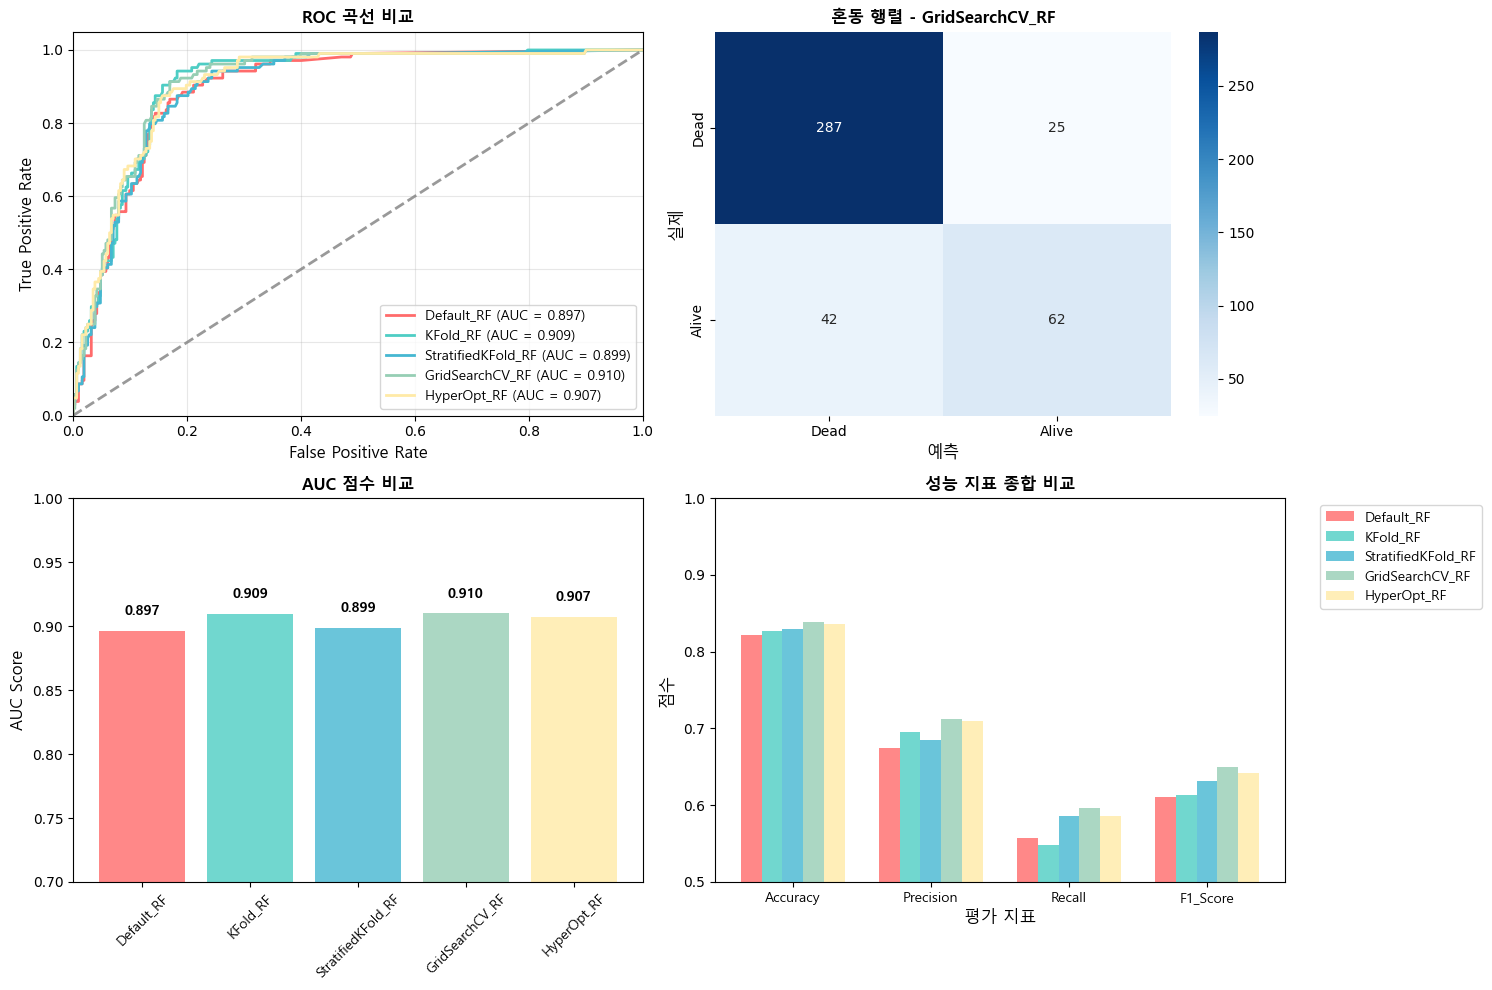


✅ ROC 곡선 및 혼동 행렬 분석 완료 (한글 폰트 적용)

📊 AUC 점수 요약:
1. GridSearchCV_RF: 0.9100
2. KFold_RF: 0.9095
3. HyperOpt_RF: 0.9070
4. StratifiedKFold_RF: 0.8985
5. Default_RF: 0.8965

🏆 최고 AUC 모델: GridSearchCV_RF (0.9100)


In [43]:
# =============================================================================
# 8. ROC 곡선 및 혼동 행렬 분석
# =============================================================================

# ROC 곡선을 위한 예측 확률 계산
models = {
    'Default_RF': model_results['Default_RF']['model'],
    'KFold_RF': model_results['KFold_RF']['model'],
    'StratifiedKFold_RF': model_results['StratifiedKFold_RF']['model'],
    'GridSearchCV_RF': model_results['GridSearchCV_RF']['model'],
    'HyperOpt_RF': model_results['HyperOpt_RF']['model']
}

# ROC 곡선 시각화
plt.figure(figsize=(15, 10))

# 1. ROC 곡선
plt.subplot(2, 2, 1)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i, (name, model) in enumerate(models.items()):
    # 예측 확률 계산
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=colors[i], lw=2, 
             label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL)
plt.ylabel('True Positive Rate', fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL)
plt.title('ROC 곡선 비교', fontsize=FONT_SIZE_LABEL, fontweight='bold', fontfamily=FONT_FAMILY)
plt.legend(loc="lower right", prop={'family': FONT_FAMILY, 'size': FONT_SIZE_TICK})
plt.grid(True, alpha=0.3)

# 2. 혼동 행렬 히트맵 (최고 성능 모델)
plt.subplot(2, 2, 2)
best_model_name = results_df['Accuracy'].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dead', 'Alive'], 
            yticklabels=['Dead', 'Alive'])
plt.title(f'혼동 행렬 - {best_model_name}', 
          fontsize=FONT_SIZE_LABEL, fontweight='bold', fontfamily=FONT_FAMILY)
plt.ylabel('실제', fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL)
plt.xlabel('예측', fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL)

# 3. 모델별 AUC 점수 비교
plt.subplot(2, 2, 3)
auc_scores = []
model_names_auc = []

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score)
    model_names_auc.append(name)

bars = plt.bar(model_names_auc, auc_scores, color=colors, alpha=0.8)
plt.title('AUC 점수 비교', fontsize=FONT_SIZE_LABEL, fontweight='bold', fontfamily=FONT_FAMILY)
plt.ylabel('AUC Score', fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL)
plt.xticks(rotation=45, fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_TICK)
plt.ylim(0.7, 1.0)

# 막대 위에 값 표시
for bar, score in zip(bars, auc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold',
             fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_TICK)

# 4. 성능 지표 종합 비교
plt.subplot(2, 2, 4)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
x = np.arange(len(metrics))
width = 0.15

for i, (name, model) in enumerate(models.items()):
    values = [results_df.loc[name, metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=name, color=colors[i], alpha=0.8)

plt.xlabel('평가 지표', fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL)
plt.ylabel('점수', fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_LABEL)
plt.title('성능 지표 종합 비교', fontsize=FONT_SIZE_LABEL, fontweight='bold', fontfamily=FONT_FAMILY)
plt.xticks(x + width*2, metrics, fontfamily=FONT_FAMILY, fontsize=FONT_SIZE_TICK)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           prop={'family': FONT_FAMILY, 'size': FONT_SIZE_TICK})
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

print("\n✅ ROC 곡선 및 혼동 행렬 분석 완료 (한글 폰트 적용)")

# AUC 점수 요약
print("\n📊 AUC 점수 요약:")
print("="*50)
auc_df = pd.DataFrame({
    'Model': model_names_auc,
    'AUC_Score': auc_scores
}).sort_values('AUC_Score', ascending=False)

for i, (_, row) in enumerate(auc_df.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['AUC_Score']:.4f}")

print(f"\n🏆 최고 AUC 모델: {auc_df.iloc[0]['Model']} ({auc_df.iloc[0]['AUC_Score']:.4f})")


🔍 Random Forest 모델별 특성 중요도 분석 시작...


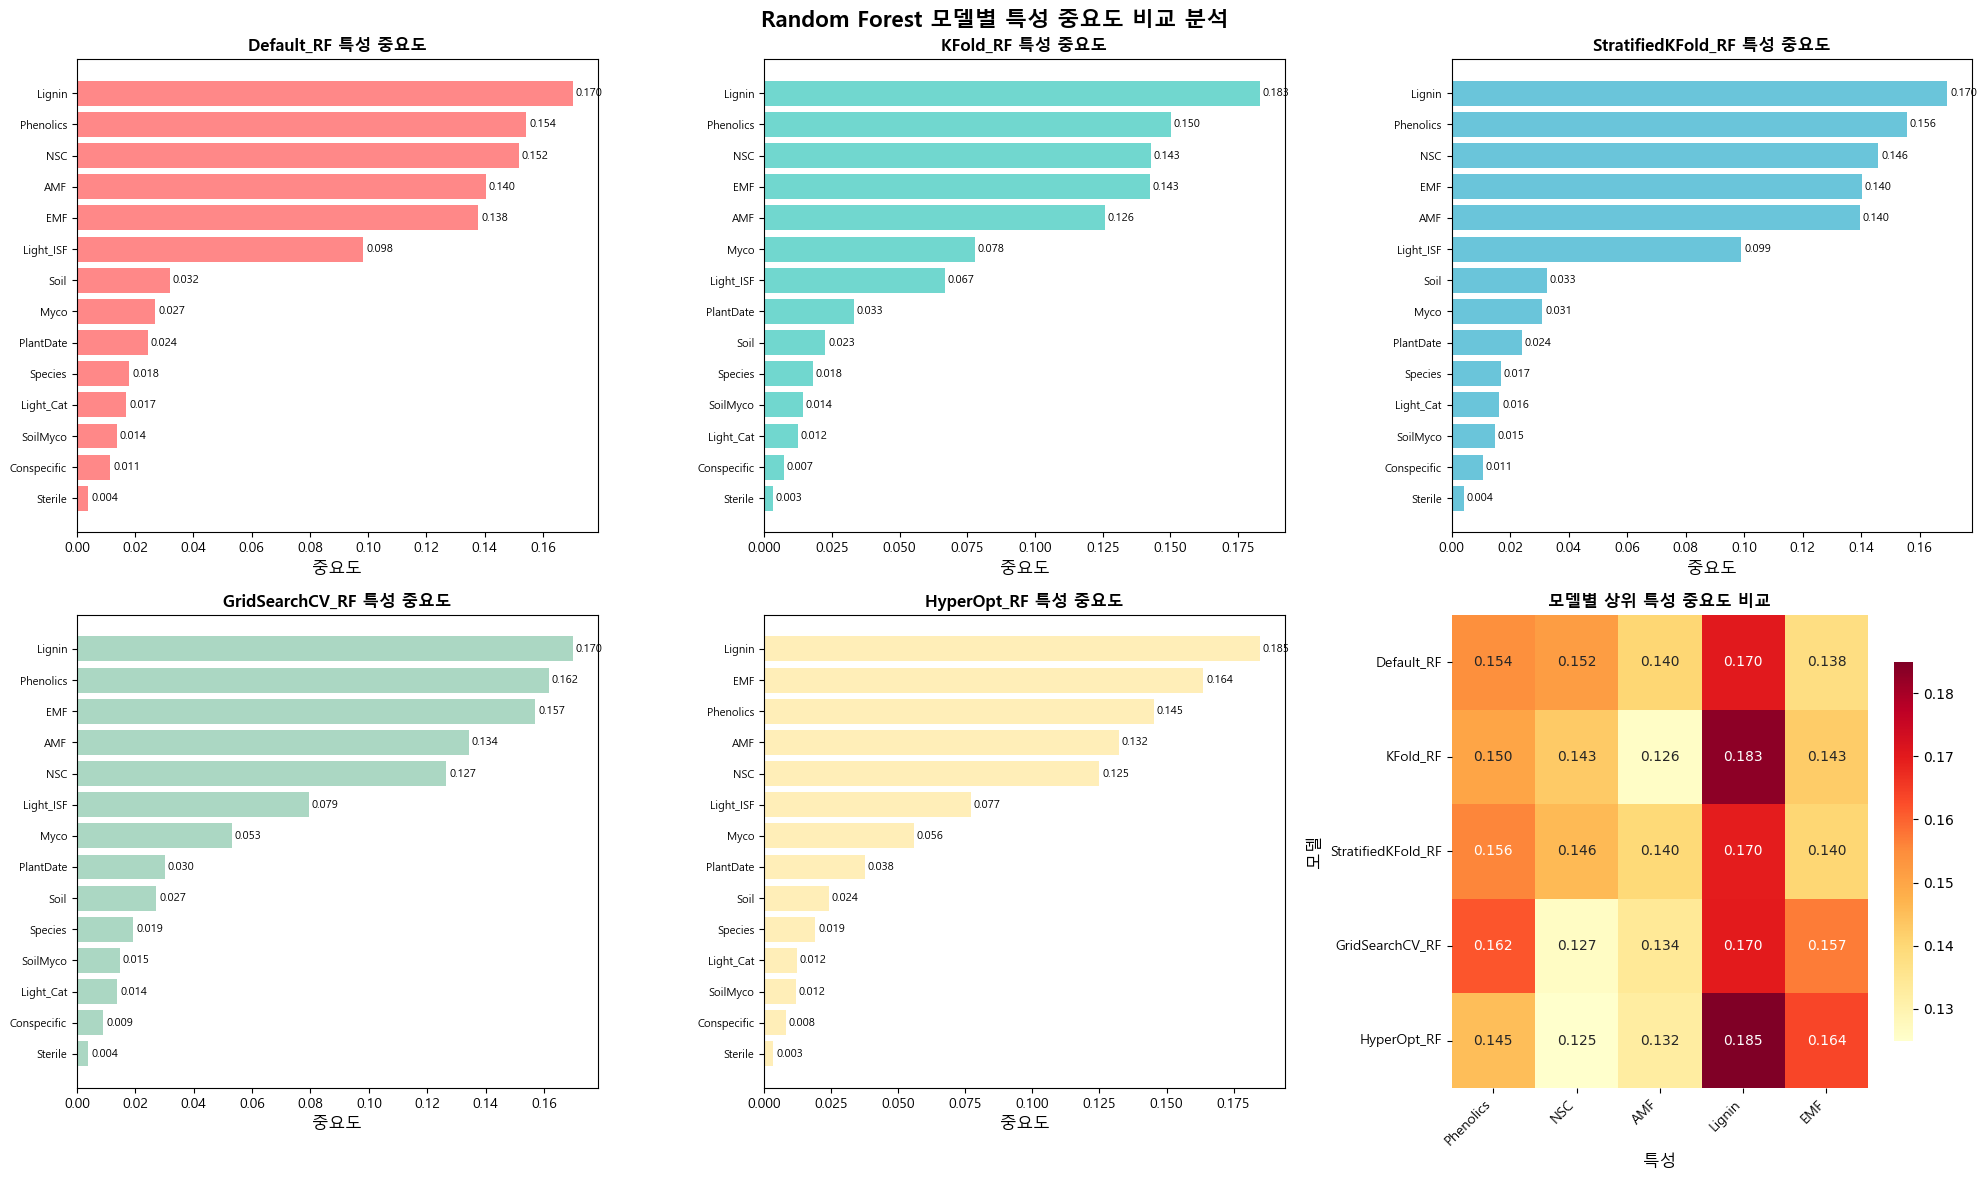


✅ 특성 중요도 비교 분석 완료!


In [44]:
# =============================================================================
# 특성 중요도 시각화 분석
# =============================================================================

def plot_feature_importance_comparison(model_results, feature_names, top_n=15):
    """여러 모델의 특성 중요도를 비교하여 시각화"""
    
    # 모델별 특성 중요도 추출
    feature_importance_data = {}
    
    for model_name, model_info in model_results.items():
        model = model_info['model']
        # GridSearchCV의 경우 best_estimator_ 사용
        if hasattr(model, 'best_estimator_'):
            feature_importance = model.best_estimator_.feature_importances_
        else:
            feature_importance = model.feature_importances_
        
        feature_importance_data[model_name] = pd.Series(
            feature_importance, 
            index=feature_names
        ).sort_values(ascending=False)
    
    # 시각화 설정
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Random Forest 모델별 특성 중요도 비교 분석', 
                 fontsize=16, fontweight='bold', fontfamily=FONT_FAMILY)
    
    # 각 모델별 특성 중요도 플롯
    model_names = list(feature_importance_data.keys())
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    
    for i, (model_name, importance) in enumerate(feature_importance_data.items()):
        row = i // 3
        col = i % 3
        
        if i < 5:  # 5개 모델만 표시
            # 상위 N개 특성만 선택
            top_features = importance.head(top_n)
            
            # 막대 그래프
            bars = axes[row, col].barh(range(len(top_features)), top_features.values, 
                                     color=colors[i], alpha=0.8)
            
            # 제목 및 라벨 설정
            set_korean_font(axes[row, col], 
                          title=f'{model_name} 특성 중요도', 
                          xlabel='중요도')
            
            # Y축 라벨 설정
            axes[row, col].set_yticks(range(len(top_features)))
            axes[row, col].set_yticklabels(top_features.index, fontfamily=FONT_FAMILY, fontsize=8)
            axes[row, col].invert_yaxis()
            
            # 값 표시
            for j, (bar, value) in enumerate(zip(bars, top_features.values)):
                axes[row, col].text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                                  f'{value:.3f}', va='center', ha='left', 
                                  fontfamily=FONT_FAMILY, fontsize=8)
    
    # 6번째 서브플롯: 모든 모델의 상위 5개 특성 비교
    if len(feature_importance_data) > 0:
        # 모든 모델의 상위 5개 특성 수집
        all_top_features = set()
        for importance in feature_importance_data.values():
            all_top_features.update(importance.head(5).index)
        
        # 상위 10개 특성만 선택
        top_10_features = list(all_top_features)[:10]
        
        # 비교 데이터 준비
        comparison_data = pd.DataFrame(index=top_10_features)
        for model_name, importance in feature_importance_data.items():
            comparison_data[model_name] = importance[top_10_features].fillna(0)
        
        # 히트맵
        sns.heatmap(comparison_data.T, annot=True, fmt='.3f', cmap='YlOrRd', 
                   ax=axes[1, 2], cbar_kws={'shrink': 0.8})
        set_korean_font(axes[1, 2], 
                       title='모델별 상위 특성 중요도 비교', 
                       xlabel='특성', ylabel='모델')
        
        # X축 라벨 회전
        axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return feature_importance_data

# 특성 중요도 비교 시각화 실행
print("🔍 Random Forest 모델별 특성 중요도 분석 시작...")

# X 변수 대신 feature_names를 사용하도록 수정
# feature_names는 데이터프레임의 컬럼명 리스트여야 함
# 예시: feature_names = X_train.columns 또는 feature_names = list(X_train.columns)
try:
    feature_names = X_train.columns
except NameError:
    # X_train이 없으면 X_test, X_valid 등에서 가져오거나 직접 지정
    feature_names = list(model_results[list(model_results.keys())[0]]['X'].columns) \
        if 'X' in model_results[list(model_results.keys())[0]] else None

if feature_names is None:
    raise ValueError("feature_names를 지정할 수 없습니다. 데이터프레임의 컬럼명을 확인하세요.")

feature_importance_data = plot_feature_importance_comparison(model_results, feature_names, top_n=15)

print("\n✅ 특성 중요도 비교 분석 완료!")


🔍 최고 성능 모델 특성 중요도 상세 분석 시작...
🏆 최고 성능 모델: GridSearchCV_RF
   F1 점수: 0.6492
   정확도: 0.8389


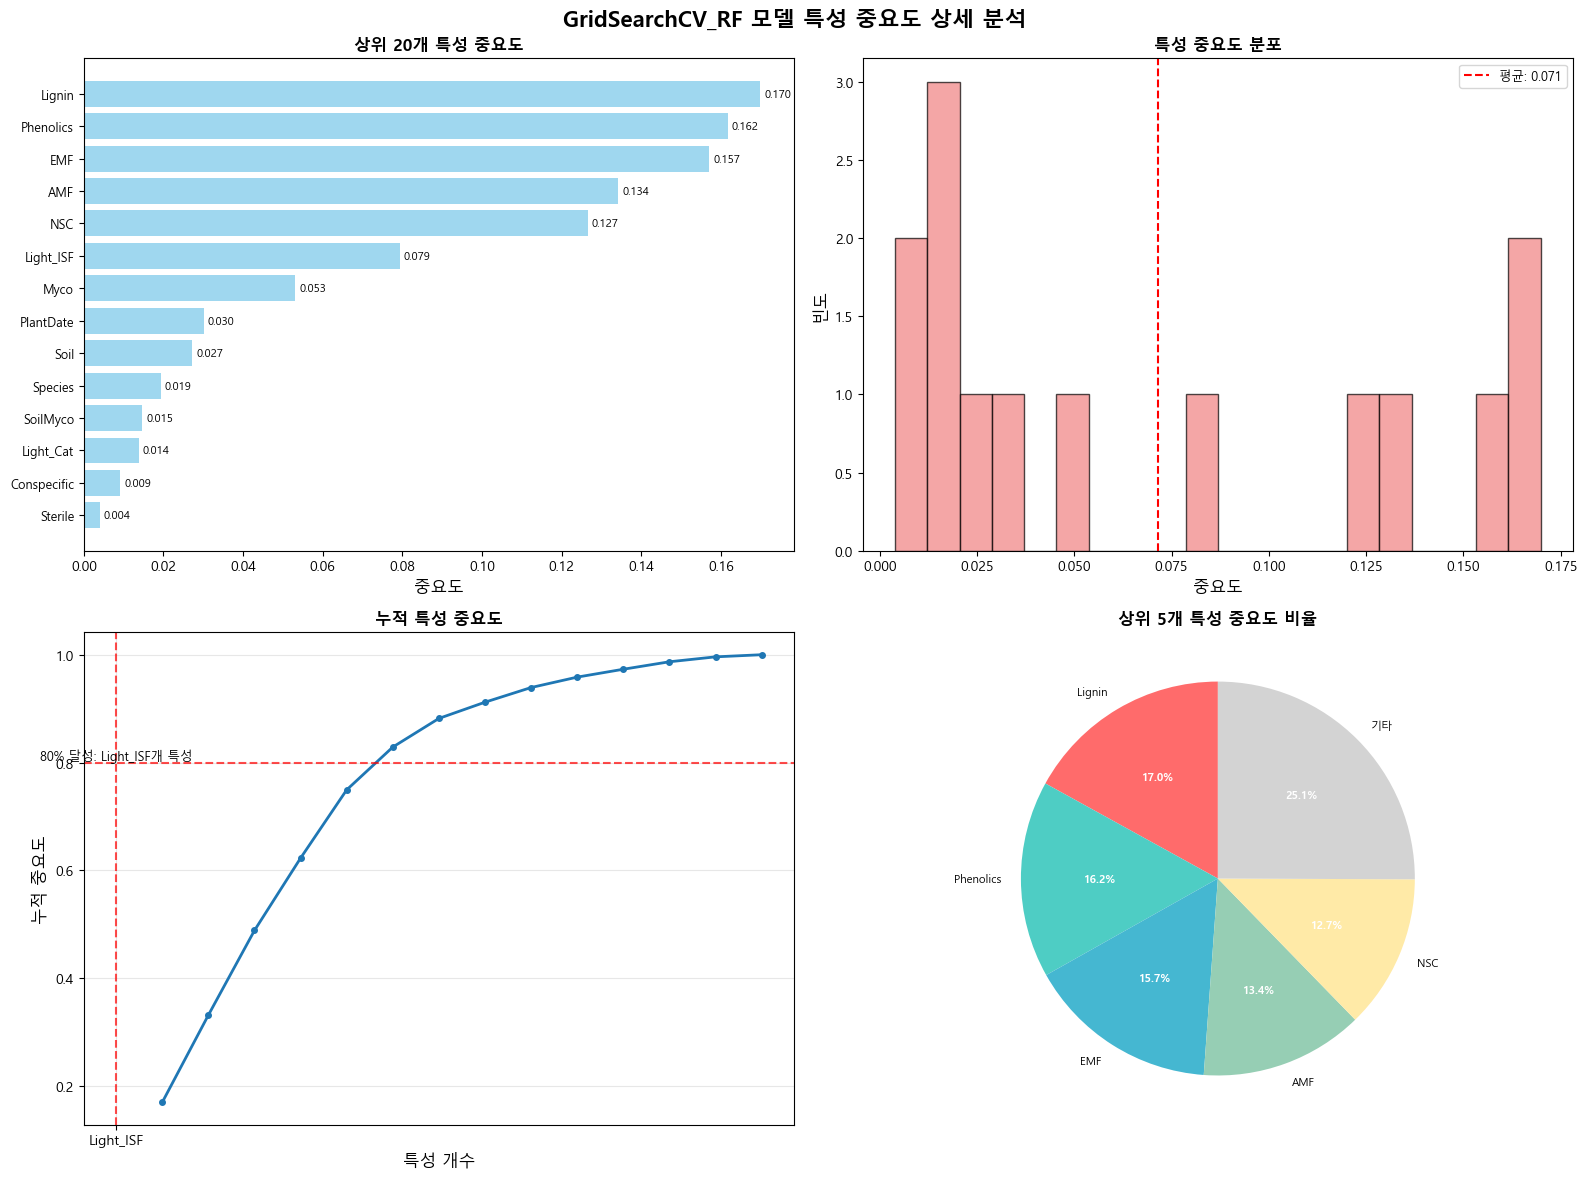


📊 GridSearchCV_RF 모델 특성 중요도 요약:
전체 특성 수: 14
평균 중요도: 0.0714
중요도 표준편차: 0.0644
최대 중요도: 0.1698
최소 중요도: 0.0040

🏆 상위 10개 중요 특성:
----------------------------------------
 1. Lignin              : 0.1698
 2. Phenolics           : 0.1617
 3. EMF                 : 0.1570
 4. AMF                 : 0.1342
 5. NSC                 : 0.1266
 6. Light_ISF           : 0.0793
 7. Myco                : 0.0531
 8. PlantDate           : 0.0301
 9. Soil                : 0.0272
10. Species             : 0.0193

📈 80% 중요도 달성에 필요한 특성 수: 9개

✅ GridSearchCV_RF 모델 특성 중요도 분석 완료!


In [45]:
# =============================================================================
# 최고 성능 모델의 특성 중요도 상세 분석
# =============================================================================

def plot_best_model_feature_importance(model_results, feature_names, top_n=20):
    """최고 성능 모델의 특성 중요도를 상세히 분석"""
    
    # 최고 성능 모델 찾기 (F1 점수 기준)
    best_model_name = max(model_results.keys(), 
                         key=lambda x: model_results[x]['metrics']['f1'])
    best_model_info = model_results[best_model_name]
    best_model = best_model_info['model']
    
    print(f"🏆 최고 성능 모델: {best_model_name}")
    print(f"   F1 점수: {best_model_info['metrics']['f1']:.4f}")
    print(f"   정확도: {best_model_info['metrics']['accuracy']:.4f}")
    
    # 특성 중요도 추출
    if hasattr(best_model, 'best_estimator_'):
        feature_importance = best_model.best_estimator_.feature_importances_
    else:
        feature_importance = best_model.feature_importances_
    
    # 특성 중요도 정렬
    feature_importance_series = pd.Series(feature_importance, index=feature_names)
    feature_importance_sorted = feature_importance_series.sort_values(ascending=False)
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{best_model_name} 모델 특성 중요도 상세 분석', 
                 fontsize=16, fontweight='bold', fontfamily=FONT_FAMILY)
    
    # 1. 상위 N개 특성 중요도 막대 그래프
    top_features = feature_importance_sorted.head(top_n)
    bars = axes[0, 0].barh(range(len(top_features)), top_features.values, 
                          color='skyblue', alpha=0.8)
    
    set_korean_font(axes[0, 0], 
                   title=f'상위 {top_n}개 특성 중요도', 
                   xlabel='중요도')
    
    axes[0, 0].set_yticks(range(len(top_features)))
    axes[0, 0].set_yticklabels(top_features.index, fontfamily=FONT_FAMILY, fontsize=9)
    axes[0, 0].invert_yaxis()
    
    # 값 표시
    for i, (bar, value) in enumerate(zip(bars, top_features.values)):
        axes[0, 0].text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                       f'{value:.3f}', va='center', ha='left', 
                       fontfamily=FONT_FAMILY, fontsize=8)
    
    # 2. 특성 중요도 분포 히스토그램
    axes[0, 1].hist(feature_importance_sorted.values, bins=20, color='lightcoral', 
                   alpha=0.7, edgecolor='black')
    set_korean_font(axes[0, 1], 
                   title='특성 중요도 분포', 
                   xlabel='중요도', ylabel='빈도')
    axes[0, 1].axvline(feature_importance_sorted.mean(), color='red', linestyle='--', 
                      label=f'평균: {feature_importance_sorted.mean():.3f}')
    axes[0, 1].legend(prop={'family': FONT_FAMILY, 'size': 9})
    
    # 3. 누적 중요도
    cumulative_importance = feature_importance_sorted.cumsum()
    axes[1, 0].plot(range(1, len(cumulative_importance) + 1), cumulative_importance, 
                   marker='o', linewidth=2, markersize=4)
    set_korean_font(axes[1, 0], 
                   title='누적 특성 중요도', 
                   xlabel='특성 개수', ylabel='누적 중요도')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 80% 중요도 달성 지점 표시
    threshold_80 = 0.8
    idx_80 = (cumulative_importance >= threshold_80).idxmax()
    axes[1, 0].axhline(y=threshold_80, color='red', linestyle='--', alpha=0.7)
    axes[1, 0].axvline(x=idx_80, color='red', linestyle='--', alpha=0.7)
    axes[1, 0].text(idx_80, threshold_80, f'80% 달성: {idx_80}개 특성', 
                   ha='center', va='bottom', fontfamily=FONT_FAMILY, fontsize=9)
    
    # 4. 상위 특성들의 중요도 비율
    top_5_features = feature_importance_sorted.head(5)
    other_features = feature_importance_sorted.iloc[5:].sum()
    
    pie_data = list(top_5_features.values) + [other_features]
    pie_labels = list(top_5_features.index) + ['기타']
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#D3D3D3']
    
    wedges, texts, autotexts = axes[1, 1].pie(pie_data, labels=pie_labels, colors=colors, 
                                            autopct='%1.1f%%', startangle=90)
    set_korean_font(axes[1, 1], title='상위 5개 특성 중요도 비율')
    
    # 텍스트 폰트 설정
    for text in texts:
        text.set_fontfamily(FONT_FAMILY)
        text.set_fontsize(8)
    for autotext in autotexts:
        autotext.set_fontfamily(FONT_FAMILY)
        autotext.set_fontsize(8)
        autotext.set_color('white')
        autotext.set_weight('bold')
    
    plt.tight_layout()
    plt.show()
    
    # 특성 중요도 요약 출력
    print(f"\n📊 {best_model_name} 모델 특성 중요도 요약:")
    print("="*60)
    print(f"전체 특성 수: {len(feature_importance_sorted)}")
    print(f"평균 중요도: {feature_importance_sorted.mean():.4f}")
    print(f"중요도 표준편차: {feature_importance_sorted.std():.4f}")
    print(f"최대 중요도: {feature_importance_sorted.max():.4f}")
    print(f"최소 중요도: {feature_importance_sorted.min():.4f}")
    
    print(f"\n🏆 상위 10개 중요 특성:")
    print("-"*40)
    for i, (feature, importance) in enumerate(feature_importance_sorted.head(10).items(), 1):
        print(f"{i:2d}. {feature:20s}: {importance:.4f}")
    
    # 80% 중요도 달성 특성 수
    threshold_80 = 0.8
    cumulative_importance = feature_importance_sorted.cumsum()
    features_for_80 = (cumulative_importance >= threshold_80).sum()
    print(f"\n📈 80% 중요도 달성에 필요한 특성 수: {features_for_80}개")
    
    return feature_importance_sorted, best_model_name

# 최고 성능 모델의 특성 중요도 분석 실행
print("🔍 최고 성능 모델 특성 중요도 상세 분석 시작...")

# feature_names를 안전하게 추출
try:
    feature_names = X_train.columns
except NameError:
    feature_names = list(model_results[list(model_results.keys())[0]]['X'].columns) \
        if 'X' in model_results[list(model_results.keys())[0]] else None

if feature_names is None:
    raise ValueError("feature_names를 지정할 수 없습니다. 데이터프레임의 컬럼명을 확인하세요.")

best_feature_importance, best_model_name = plot_best_model_feature_importance(model_results, feature_names, top_n=20)

print(f"\n✅ {best_model_name} 모델 특성 중요도 분석 완료!")


In [46]:
# =============================================================================
# 9. 종합 분석 및 결론
# =============================================================================

print("\n" + "="*80)
print("📊 Random Forest 모델 종합 분석 및 결론")
print("="*80)

# 성능 순위 계산
performance_ranking = results_df.sort_values('Accuracy', ascending=False)
print("\n🏆 모델 성능 순위 (정확도 기준):")
print("="*50)
for i, (model, row) in enumerate(performance_ranking.iterrows(), 1):
    print(f"{i}. {model}: {row['Accuracy']:.4f} (F1: {row['F1_Score']:.4f})")

# 각 접근법별 분석
print("\n🔍 접근법별 상세 분석:")
print("="*50)

for i, (model_name, model_info) in enumerate(model_results.items(), 1):
    print(f"\n{i}️⃣ {model_name}:")
    print(f"   - 정확도: {model_info['metrics']['accuracy']:.4f}")
    print(f"   - F1 점수: {model_info['metrics']['f1']:.4f}")
    print(f"   - 과적합 정도: {model_info['scores']['train_score'] - model_info['scores']['test_score']:.4f}")
    print(f"   - 교차검증 점수: {model_info['scores']['cv_mean']:.4f} (±{model_info['scores']['cv_std']:.4f})")
    print(f"   - 파라미터: {model_info['params']}")

# 최고 성능 모델
best_model = performance_ranking.index[0]
best_accuracy = performance_ranking.iloc[0]['Accuracy']
best_f1 = performance_ranking.iloc[0]['F1_Score']

print(f"\n🥇 최고 성능 모델: {best_model}")
print(f"   - 테스트 정확도: {best_accuracy:.4f}")
print(f"   - F1 점수: {best_f1:.4f}")
print(f"   - 교차검증 점수: {performance_ranking.iloc[0]['CV_Mean']:.4f}")

# 과적합 분석
print(f"\n⚠️ 과적합 분석:")
overfitting_analysis = results_df['Train_Score'] - results_df['Test_Score']
for model in results_df.index:
    overfitting = overfitting_analysis[model]
    if overfitting > 0.1:
        status = "🔴 심한 과적합"
    elif overfitting > 0.05:
        status = "🟡 주의 필요"
    else:
        status = "🟢 적절"
    print(f"   - {model}: {overfitting:.4f} {status}")

# AUC 점수 요약
print(f"\n📊 AUC 점수 요약:")
print("="*50)
auc_df = pd.DataFrame({
    'Model': model_names_auc,
    'AUC_Score': auc_scores
}).sort_values('AUC_Score', ascending=False)

for i, (_, row) in enumerate(auc_df.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['AUC_Score']:.4f}")

print(f"\n🏆 최고 AUC 모델: {auc_df.iloc[0]['Model']} ({auc_df.iloc[0]['AUC_Score']:.4f})")

# 최종 권장사항
print(f"\n💡 최종 권장사항:")
print("="*50)

if best_model == 'Default_RF':
    print("✅ 기본 Random Forest가 최고 성능을 보임")
    print("   - 이 데이터셋에는 기본 파라미터가 최적")
    print("   - 추가 튜닝보다는 데이터 품질 개선에 집중")
elif best_model in ['GridSearchCV_RF', 'HyperOpt_RF']:
    print("✅ 하이퍼파라미터 튜닝이 효과적")
    print("   - 체계적인 파라미터 탐색이 성능 향상에 기여")
    print("   - 유사한 데이터셋에 동일한 접근법 적용 권장")
else:
    print("✅ 특정 접근법이 효과적")
    print(f"   - {best_model} 방식이 이 데이터셋에 적합")
    print("   - 해당 접근법의 특징을 다른 프로젝트에 활용")

print(f"\n🎯 실무 적용 가이드:")
print("1. 기본 모델부터 시작하여 성능 기준점 설정")
print("2. 과적합이 심한 경우 정규화 기법 적용")
print("3. 충분한 데이터가 있다면 하이퍼파라미터 튜닝")
print("4. 교차검증과 테스트 성능을 모두 고려한 모델 선택")
print("5. 계산 비용과 성능 향상의 트레이드오프 고려")

print("\n" + "="*80)
print("✅ Random Forest 모델 비교 분석 완료!")
print("="*80)



📊 Random Forest 모델 종합 분석 및 결론

🏆 모델 성능 순위 (정확도 기준):
1. GridSearchCV_RF: 0.8389 (F1: 0.6492)
2. HyperOpt_RF: 0.8365 (F1: 0.6421)
3. StratifiedKFold_RF: 0.8293 (F1: 0.6321)
4. KFold_RF: 0.8269 (F1: 0.6129)
5. Default_RF: 0.8221 (F1: 0.6105)

🔍 접근법별 상세 분석:

1️⃣ Default_RF:
   - 정확도: 0.8221
   - F1 점수: 0.6105
   - 과적합 정도: 0.1369
   - 교차검증 점수: 0.7768 (±0.0565)
   - 파라미터: {'n_estimators': 100, 'random_state': 42}

2️⃣ KFold_RF:
   - 정확도: 0.8269
   - F1 점수: 0.6129
   - 과적합 정도: 0.0425
   - 교차검증 점수: 0.7718 (±0.0577)
   - 파라미터: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'random_state': 42}

3️⃣ StratifiedKFold_RF:
   - 정확도: 0.8293
   - F1 점수: 0.6321
   - 과적합 정도: 0.1297
   - 교차검증 점수: 0.7705 (±0.0601)
   - 파라미터: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'random_state': 42}

4️⃣ GridSearchCV_RF:
   - 정확도: 0.8389
   - F1 점수: 0.6492
   - 과적합 정도: 

# RandomForestClassifier 모델 성능 비교 분석 README.md



In [ ]:
# 특성 중요도 시각화
plt.figure(figsize=(12, 8))

# 특성 중요도 정렬
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
